    HOME_TEAM_ID  home_win_rate  home_games_played
22    1610612759       0.727176                942
6     1610612743       0.674685                873
7     1610612744       0.668137                907
11    1610612748       0.659020                959
25    1610612762       0.656751                874
Correlation with winning:
FG_PCT_home     0.431609
FG3_PCT_home    0.300830
Name: HOME_TEAM_WINS, dtype: float64
Correlation:
                 REB_home  HOME_TEAM_WINS
REB_home        1.000000        0.245481
HOME_TEAM_WINS  0.245481        1.000000

Average Rebounds by Win/Loss:
 HOME_TEAM_WINS
0    41.437307
1    44.734548
Name: REB_home, dtype: float64


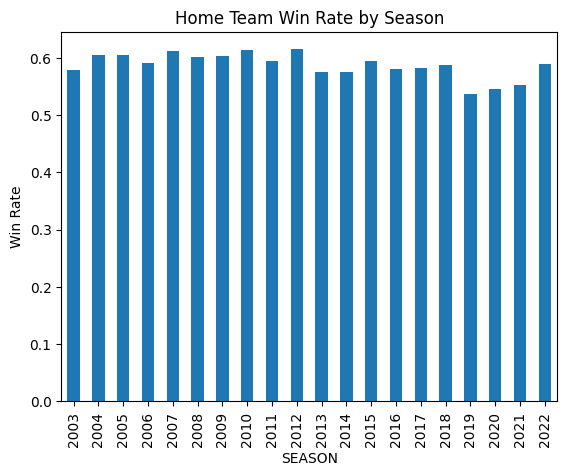

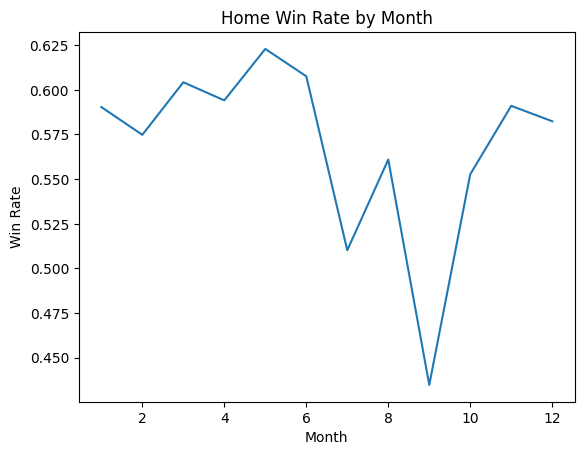


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      2201
           1       0.78      0.83      0.80      3130

    accuracy                           0.76      5331
   macro avg       0.76      0.75      0.75      5331
weighted avg       0.76      0.76      0.76      5331

        Feature  Coefficient
0   FG_PCT_home    20.404497
1  FG3_PCT_home     3.791837
3      REB_home     0.146136
2      AST_home     0.007494
    TEAM_ID_home  Under_pressure  wins  games   win_pct
44    1610612759           False   519    703  0.738265
14    1610612744           False   476    677  0.703102
12    1610612743           False   457    657  0.695586
45    1610612759            True   166    239  0.694561
22    1610612748           False   451    662  0.681269
50    1610612762           False   425    628  0.676752
10    1610612742       

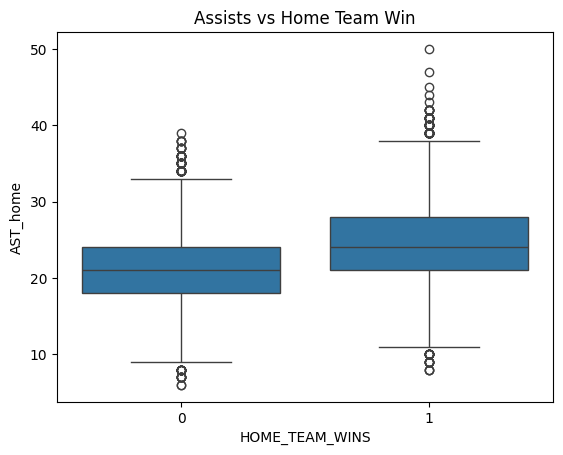

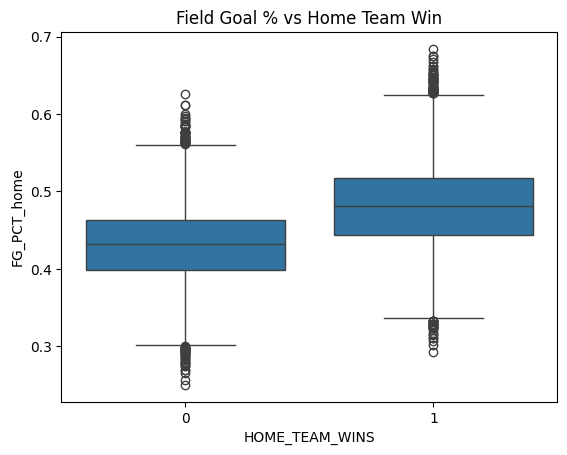

month
1     0.590364
2     0.574815
3     0.604245
4     0.594110
5     0.622912
6     0.607595
7     0.510204
8     0.560976
9     0.434783
10    0.552708
11    0.591036
12    0.582412
Name: HOME_TEAM_WINS, dtype: float64
weekday
Friday       0.579561
Monday       0.582558
Saturday     0.591675
Sunday       0.581257
Thursday     0.577304
Tuesday      0.602911
Wednesday    0.590649
Name: HOME_TEAM_WINS, dtype: float64


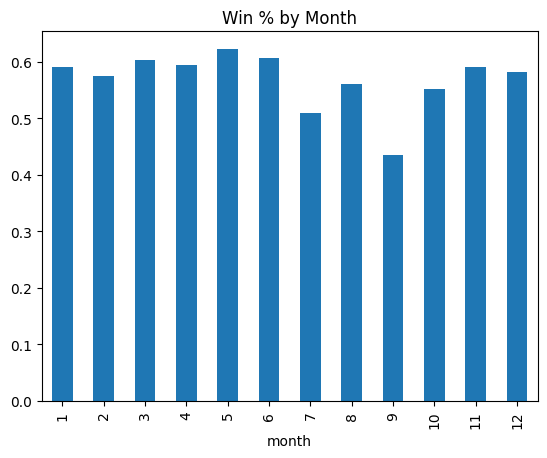

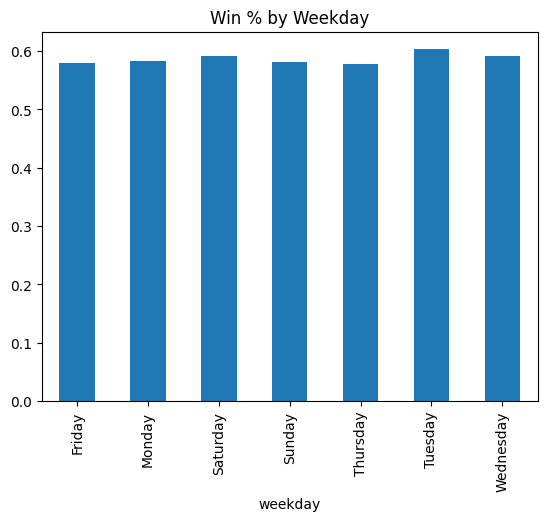

    TEAM_ID_home  wins  games  win_pct_low_fg
17    1610612754    51    136        0.375000
4     1610612741    59    195        0.302564
22    1610612759    18     60        0.300000
8     1610612745    42    142        0.295775
24    1610612761    36    122        0.295082
6     1610612743    28     95        0.294737
11    1610612748    28     96        0.291667
26    1610612763    41    144        0.284722
28    1610612765    37    141        0.262411
10    1610612747    35    138        0.253623
1     1610612738    31    125        0.248000
5     1610612742    30    121        0.247934
7     1610612744    21     86        0.244186
3     1610612740    27    113        0.238938
25    1610612762    21     92        0.228261
20    1610612757    24    109        0.220183
21    1610612758    20     91        0.219780
23    1610612760    21     98        0.214286
19    1610612756    16     76        0.210526
29    1610612766    31    150        0.206667
2     1610612739    30    148     

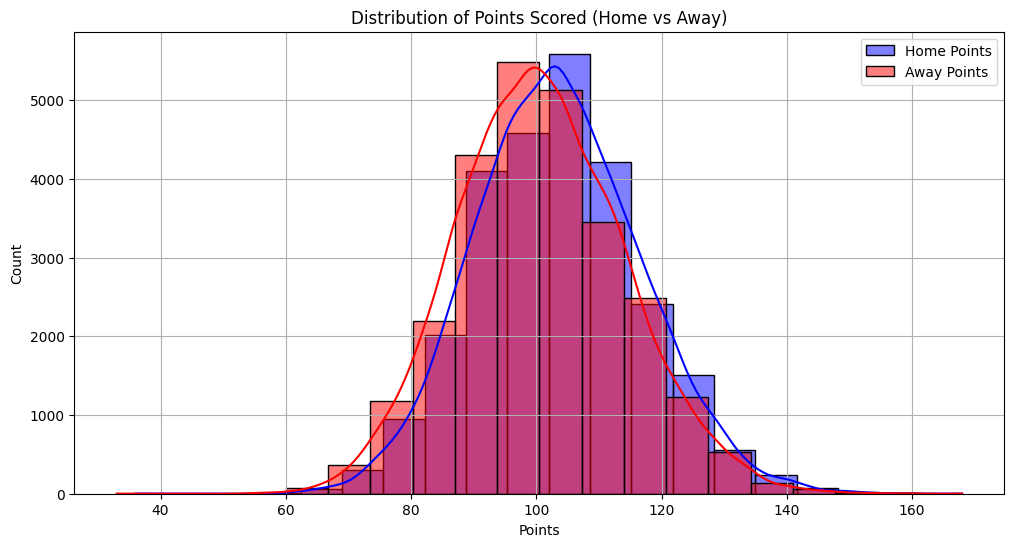

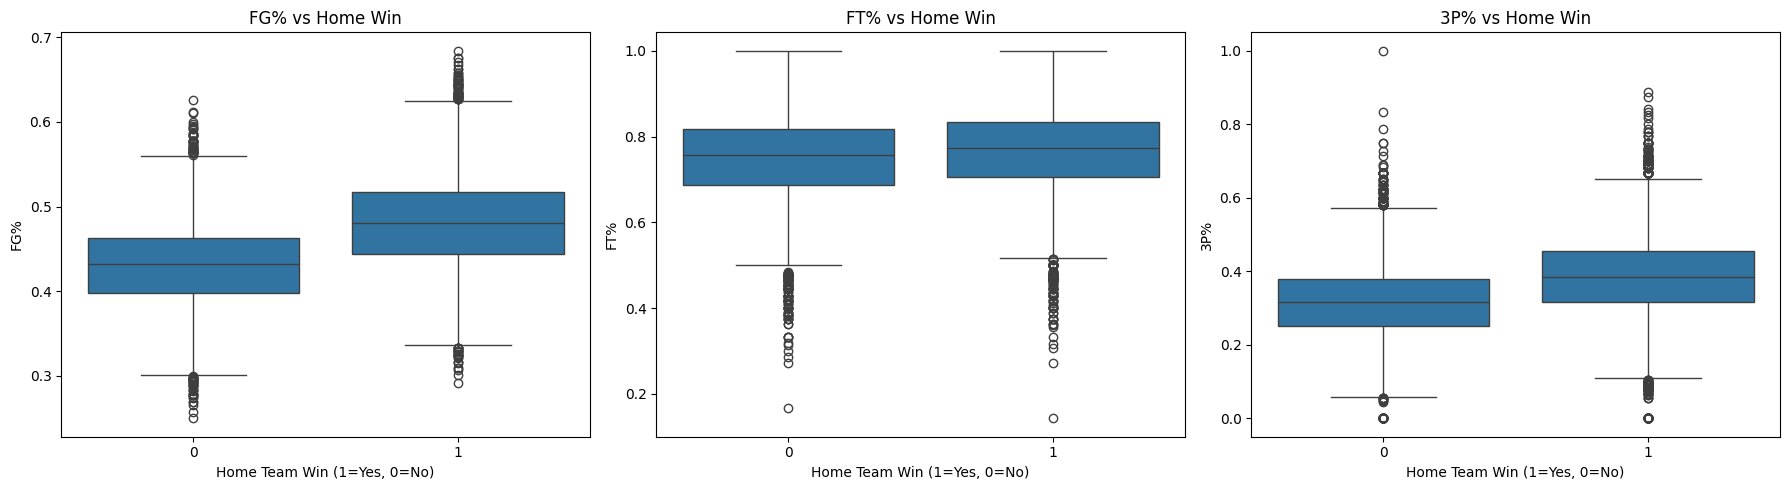

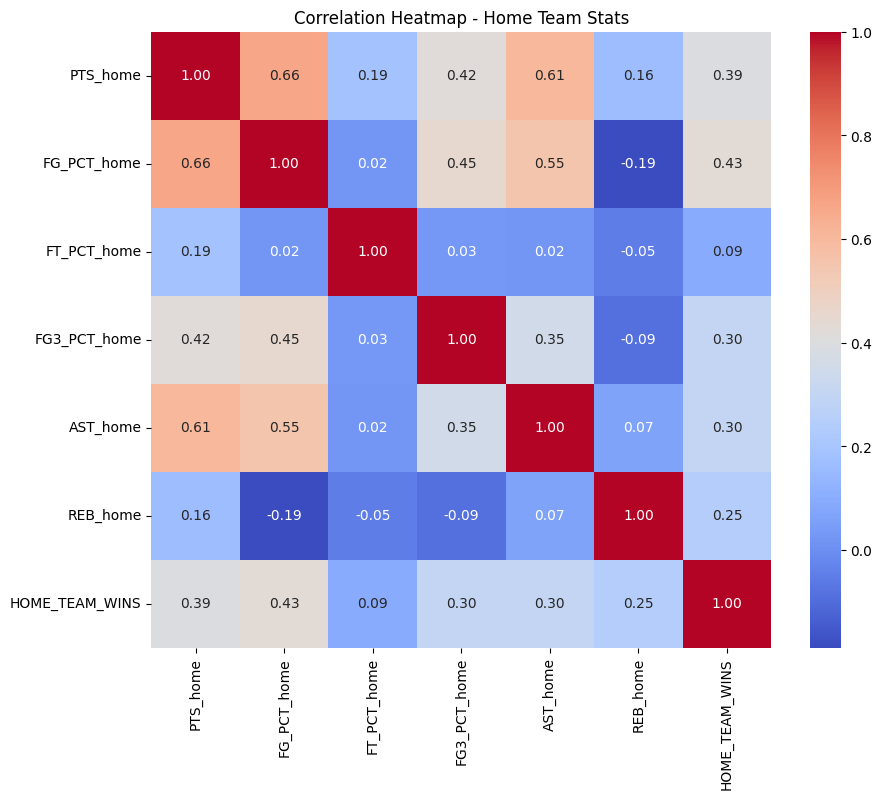

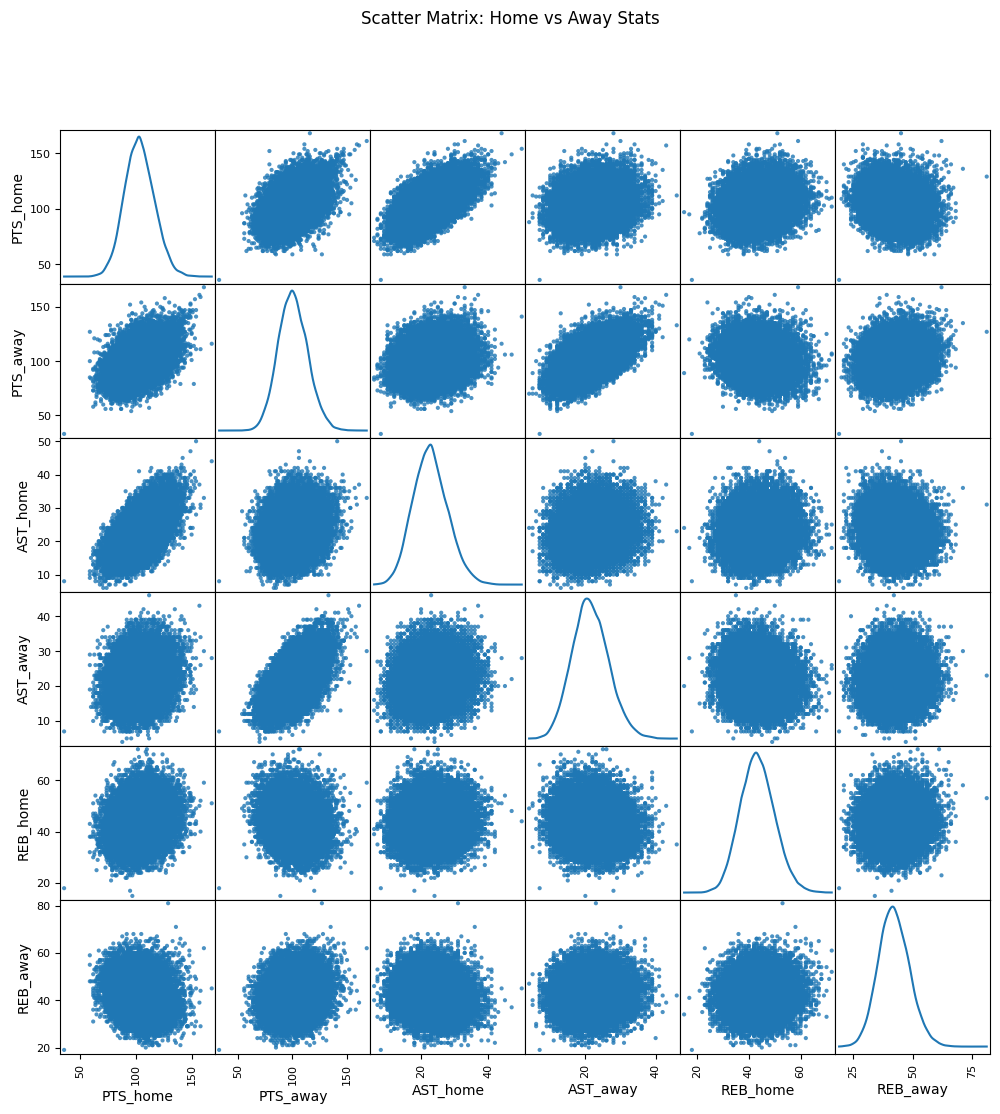

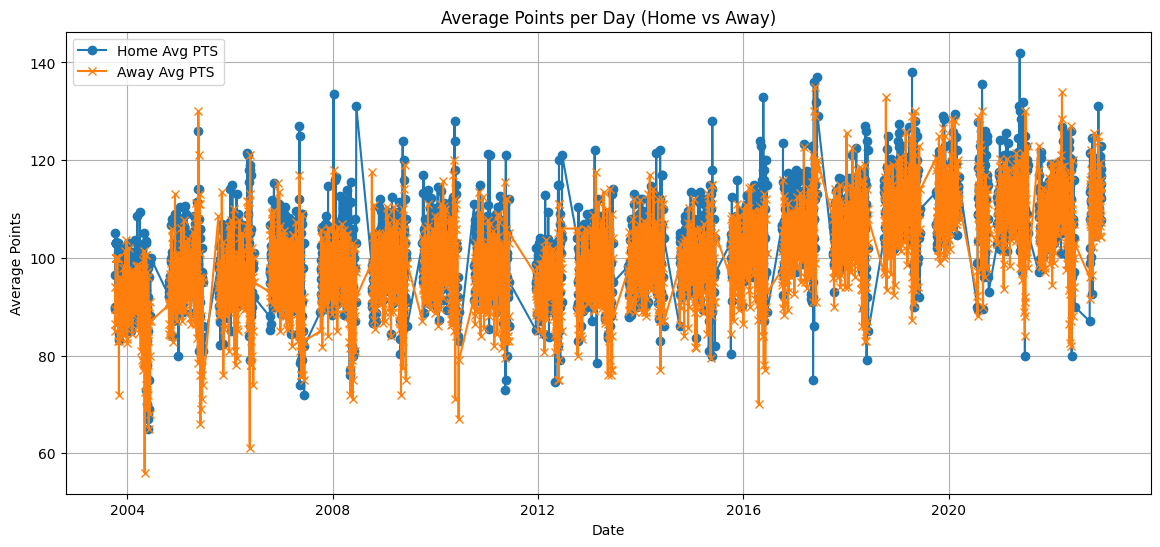

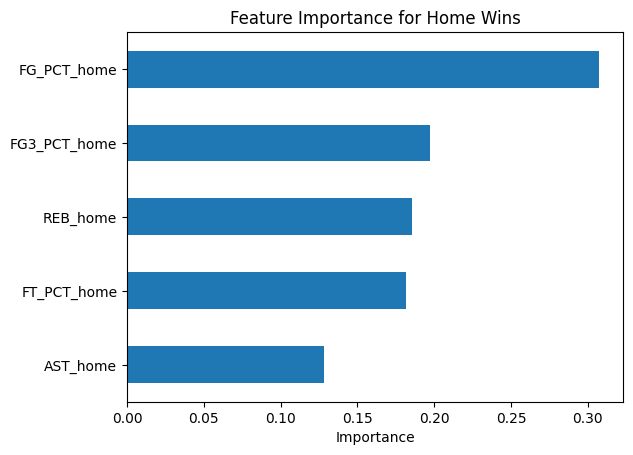

In [28]:
import pandas as pd
df = pd.read_csv('/Users/hadjer/data/games.csv')
df.head()
#### Data cleaning ###
# Check for Duplicates
df.duplicated().sum()
df.isnull().sum()
df['PTS_home'] = df['PTS_home'].fillna(df['PTS_home'].median())
df.isnull().sum()
df['FG_PCT_home'] = df['FG_PCT_home'].fillna(df['FG_PCT_home'].median())
df.isnull().sum()
df['FT_PCT_home'] = df['FT_PCT_home'].fillna(df['FT_PCT_home'].median())
df.isnull().sum()
df['FG3_PCT_home'] = df['FG3_PCT_home'].fillna(df['FG3_PCT_home'].median())
df.isnull().sum()
df['AST_home'] = df['AST_home'].fillna(df['AST_home'].median())
df.isnull().sum()
df['REB_home'] = df['REB_home'].fillna(df['REB_home'].median())
df.isnull().sum()
df['PTS_away'] = df['PTS_away'].fillna(df['PTS_away'].median())
df.isnull().sum()
df['FG_PCT_away'] = df['FG_PCT_away'].fillna(df['FG_PCT_away'].median())
df.isnull().sum()
df['FT_PCT_away'] = df['FT_PCT_away'].fillna(df['FT_PCT_away'].median())
df.isnull().sum()
df['FG3_PCT_away'] = df['FG3_PCT_away'].fillna(df['FG3_PCT_away'].median())
df.isnull().sum()
df['AST_away'] = df['AST_away'].fillna(df['AST_away'].median())
df.isnull().sum()
df['REB_away'] = df['REB_away'].fillna(df['REB_away'].median())
df.isnull().sum()
# Save the new data
df.to_csv('cleaned_data.csv', index=False)
#Data types
# View data type : **Fix Data Types**
df.dtypes
#GAME_DATE_EST is currently object, This column should ideally be converted to a proper datetime format so you can use it for time-based analysis or plotting.
df['GAME_DATE_EST'] = pd.to_datetime(df['GAME_DATE_EST'])
df['GAME_DATE_EST'].dt.year # returns the year
df['GAME_DATE_EST'].dt.month  # returns the month
df['GAME_DATE_EST'].dt.dayofweek  # returns 0 (Monday) to 6 (Sunday)
###Which teams have the highest win rates at home?#####
# Group by home team and calculate win rate
home_win_rates = df.groupby('HOME_TEAM_ID')['HOME_TEAM_WINS'].agg(['mean', 'count']).reset_index()
home_win_rates = home_win_rates.rename(columns={'mean': 'home_win_rate', 'count': 'home_games_played'})
# Sort by win rate
top_home_teams = home_win_rates.sort_values(by='home_win_rate', ascending=False)
print(top_home_teams.head())
###Is FG% or 3PT% more correlated with winning?
correlations = df[['HOME_TEAM_WINS', 'FG_PCT_home', 'FG3_PCT_home']].corr()
print("Correlation with winning:")
print(correlations['HOME_TEAM_WINS'].drop('HOME_TEAM_WINS'))
#How do rebounds affect game outcomes?
# Correlation
reb_correlation = df[["REB_home", "HOME_TEAM_WINS"]].corr()
# Average rebounds in wins vs. losses
avg_reb = df.groupby("HOME_TEAM_WINS")["REB_home"].mean()
print("Correlation:\n", reb_correlation)
print("\nAverage Rebounds by Win/Loss:\n", avg_reb)
#Are there any seasonal performance trends? This depends on how many seasons your dataset contains. For your case (mostly 2022), it might not show much. But if multiple seasons are present:
# Average home team win rate by season
season_win_rate = df.groupby("SEASON")["HOME_TEAM_WINS"].mean()
# Plot
import matplotlib.pyplot as plt
season_win_rate.plot(kind="bar", title="Home Team Win Rate by Season")
plt.ylabel("Win Rate")
plt.show()
#If you want monthly trends:
df["GAME_DATE_EST"] = pd.to_datetime(df["GAME_DATE_EST"])
df["Month"] = df["GAME_DATE_EST"].dt.month
monthly_trends = df.groupby("Month")["HOME_TEAM_WINS"].mean()
monthly_trends.plot(kind="line", title="Home Win Rate by Month")
plt.ylabel("Win Rate")
plt.xlabel("Month")
plt.show()
#Bonus: Combine FG%, 3PT%, AST, and REB into a model You could also build a logistic regression model to predict win probability:
!pip install scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X = df[["FG_PCT_home", "FG3_PCT_home", "AST_home", "REB_home"]]
y = df["HOME_TEAM_WINS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))
###What factors most influence home team wins?
#You can analyze feature importance using models like Logistic Regression (coefficients), Random Forest (feature importance), or XGBoost (feature importance).
#Example: Logistic Regression coefficients
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
features = ["FG_PCT_home", "FG3_PCT_home", "AST_home", "REB_home"]
X = df[features]
y = df["HOME_TEAM_WINS"]
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(coef_df)  #Positive coefficients increase chances of home win and Negative coefficients decrease chances.
#Which teams perform best under free-throw pressure? Map TEAM_ID_home to team names (you might need an external team dictionary), then calculate win percentage when FT_PCT_home is low vs. high.
# Define threshold for "pressure" (e.g., below 70% FT%)
pressure_threshold = 0.7
team_stats = df.copy()
team_stats['Under_pressure'] = team_stats['FT_PCT_home'] < pressure_threshold
# Group by team and pressure condition
performance = team_stats.groupby(['TEAM_ID_home', 'Under_pressure']).agg(
    wins=('HOME_TEAM_WINS', 'sum'),
    games=('HOME_TEAM_WINS', 'count')
).reset_index()
performance['win_pct'] = performance['wins'] / performance['games']
print(performance.sort_values(by='win_pct', ascending=False))
#How important is AST vs FG% in winning? You can compare feature importance (like in #1) or analyze correlation:
print(df[['AST_home', 'FG_PCT_home', 'HOME_TEAM_WINS']].corr())
#Or plot relationship:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='HOME_TEAM_WINS', y='AST_home', data=df)
plt.title("Assists vs Home Team Win")
plt.show()
sns.boxplot(x='HOME_TEAM_WINS', y='FG_PCT_home', data=df)
plt.title("Field Goal % vs Home Team Win")
plt.show()
##Win-loss pattern across months or game days
##First, convert GAME_DATE_EST to datetime:
df['GAME_DATE_EST'] = pd.to_datetime(df['GAME_DATE_EST'])
df['month'] = df['GAME_DATE_EST'].dt.month
df['weekday'] = df['GAME_DATE_EST'].dt.day_name()
monthly_win = df.groupby('month')['HOME_TEAM_WINS'].mean()
weekday_win = df.groupby('weekday')['HOME_TEAM_WINS'].mean()
print(monthly_win)
print(weekday_win)
# Optional plotting
monthly_win.plot(kind='bar', title='Win % by Month')
plt.show()
weekday_win.plot(kind='bar', title='Win % by Weekday')
plt.show()
##Which teams outperform despite low shooting %
#Define low shooting % (e.g., FG% < 40%) and find teams with good wins despite that:
low_shooting_threshold = 0.4
low_fg_games = df[df['FG_PCT_home'] < low_shooting_threshold]
team_performance_low_fg = low_fg_games.groupby('TEAM_ID_home').agg(
    wins=('HOME_TEAM_WINS', 'sum'),
    games=('HOME_TEAM_WINS', 'count')
).reset_index()
team_performance_low_fg['win_pct_low_fg'] = team_performance_low_fg['wins'] / team_performance_low_fg['games']
print(team_performance_low_fg.sort_values(by='win_pct_low_fg', ascending=False))
##Build classification models You already started with Logistic Regression! You can expand to Random Forest and XGBoost to compare.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print(classification_report(y_test, rf_preds))
#Distribution of Home and Away Team Points
plt.figure(figsize=(12, 6))
sns.histplot(df['PTS_home'], kde=True, color='blue', label='Home Points', bins=20)
sns.histplot(df['PTS_away'], kde=True, color='red', label='Away Points', bins=20)
plt.title("Distribution of Points Scored (Home vs Away)")
plt.xlabel("Points")
plt.legend()
plt.grid(True)
plt.show()
#Home Win Rate vs. FG%, FT%, and 3P%
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
stats = ['FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home']
titles = ['FG%', 'FT%', '3P%']

for ax, stat, title in zip(axs, stats, titles):
    sns.boxplot(data=df, x='HOME_TEAM_WINS', y=stat, ax=ax)
    ax.set_title(f'{title} vs Home Win')
    ax.set_xlabel("Home Team Win (1=Yes, 0=No)")
    ax.set_ylabel(title)
plt.tight_layout()
plt.show()
#Correlation Heatmap (Home Team Stats)
plt.figure(figsize=(10, 8))
home_stats = df[['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'HOME_TEAM_WINS']]
sns.heatmap(home_stats.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Home Team Stats")
plt.show()
#Home vs Away Team Stats Comparison (Scatter Matrix)
from pandas.plotting import scatter_matrix
comparison_stats = df[['PTS_home', 'PTS_away', 'AST_home', 'AST_away', 'REB_home', 'REB_away']]
scatter_matrix(comparison_stats, figsize=(12, 12), alpha=0.8, diagonal='kde')
plt.suptitle("Scatter Matrix: Home vs Away Stats")
plt.show()
#Average Points Over Time
df['GAME_DATE_EST'] = pd.to_datetime(df['GAME_DATE_EST'])
daily_avg = df.groupby('GAME_DATE_EST')[['PTS_home', 'PTS_away']].mean().reset_index()
plt.figure(figsize=(14, 6))
plt.plot(daily_avg['GAME_DATE_EST'], daily_avg['PTS_home'], label='Home Avg PTS', marker='o')
plt.plot(daily_avg['GAME_DATE_EST'], daily_avg['PTS_away'], label='Away Avg PTS', marker='x')
plt.title("Average Points per Day (Home vs Away)")
plt.xlabel("Date")
plt.ylabel("Average Points")
plt.legend()
plt.grid(True)
plt.show()
##Which Stats Matter Most for Winning at Home?
from sklearn.ensemble import RandomForestClassifier
features = ['FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home']
X = df[features]
y = df['HOME_TEAM_WINS']
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', title="Feature Importance for Home Wins")
plt.xlabel("Importance")
plt.show()